**Part one: transverse Ising model $(J, h)$ phase diagram (without symmetries)**

First, let us form the many-body Hamiltonian of the form ($J = 1$, periodic BC):
$$\hat H = \sum\limits_{i=0}^{N - 1} \sigma_i^z \sigma_{i + 1}^z + h \sum\limits_i \sigma^x.$$

We will construct the Hamiltonian matrix in the $\sigma^z$ basis of the $2^N$--dimensional Hilbert space. We employ the _bitstring represenation_: the basis element number $k$ should be written in the binary representation to get the individual spin orientations. 

For instance, the basis element $k = 415 = 256 + 128 + 16 + 8 + 4 + 2 + 1$ with $N = 10$ spins would correspond to the bitstring (-1, 1, 1, -1, -1, 1, 1, 1, 1, 1), meaning, 0-th, 3-rd and 4-th spins are down, others up.

First, please construct the first term:

In [1]:
import numpy as np
import scipy as sp

sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, 1j], [-1j, 0]])
sigma_z = np.diag([1, -1])
sigma_0 = np.eye(2)
N = 3  # the number of spins in the system

def fill_identities(h_local, begin, end):
    if end <= begin:
        return h_local
    return np.kron(np.eye(2 ** (end - begin)), h_local)


def hamiltonian_j(N):
    H = np.zeros((2 ** N, 2 ** N), dtype=np.complex128)  # shape of the full many-body N-spins hamiltonian
    for i in range(N - 1):  # loop over all spins except the boundary pair
        h_local = np.eye(1, dtype=np.complex128)
        h_local = fill_identities(h_local, 0, i)
            
        h_local = np.kron(sigma_z, h_local)
        h_local = np.kron(sigma_z, h_local)

        h_local = fill_identities(h_local, i + 2, N)
        H += h_local
    
    h_local = sigma_z  # now fix the boundary
    h_local = fill_identities(h_local, 1, N - 1)
        
    h_local = np.kron(sigma_z, h_local)
    H += h_local
    return H.real

Then please construct the transverse field term with $h = 1$:

In [2]:
def hamiltonian_h(N):
    H = np.zeros((2 ** N, 2 ** N), dtype=np.complex128)  # shape of the full many-body N-spins hamiltonian
    for i in range(N):  # the h-term
        h_local = np.eye(1, dtype=np.complex128)
        h_local = fill_identities(h_local, 0, i)
        h_local = np.kron(sigma_x, h_local)
        h_local = fill_identities(h_local, i + 1, N)
        H += h_local
    return H.real

In [3]:
H_j = hamiltonian_j(N)  # obtain the j-part (remains unchanged)
H_h = hamiltonian_h(N)  # obtain normalized h--part
print(H_h)

[[0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 1. 0.]]


Now obtain the low-energy spectrum of the model:

In [4]:
# obtain the low-energy spectrum of the model
n_low_levels = 8
h_vals = np.linspace(-2, 2, 40)
levels = []

for h in h_vals:
    H = H_j + H_h * h  # construct the total Hamiltonian
    energies_h, _ = np.linalg.eigh(H)
    levels.append(energies_h[:n_low_levels])
levels = np.array(levels)

In [5]:
h=1
H = H_j + H_h * h
print(H)
energies_h, _ = np.linalg.eigh(H)
print(energies_h)

[[ 3.  1.  1.  0.  1.  0.  0.  0.]
 [ 1. -1.  0.  1.  0.  1.  0.  0.]
 [ 1.  0. -1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1. -1.  0.  0.  0.  1.]
 [ 1.  0.  0.  0. -1.  1.  1.  0.]
 [ 0.  1.  0.  0.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1.  0. -1.  1.]
 [ 0.  0.  0.  1.  0.  1.  1.  3.]]
[-3.46410162e+00 -2.00000000e+00 -2.00000000e+00 -4.72197789e-16
 -1.31221193e-16  1.59329772e-16  3.46410162e+00  4.00000000e+00]


Plot the obtained energy spectrum as a function of $h / J$:

[-6.29150262 -5.99555276 -5.70055689 -5.40663183 -5.11391347 -4.82256058
 -4.53275962 -4.24473056 -3.95873429 -3.67508171 -3.39414516 -3.11637261
 -2.84230529 -2.5725993  -2.30805174 -2.04963136 -1.7985128  -1.55611152
 -1.32411323 -1.10448628 -1.10448628 -1.32411323 -1.55611152 -1.7985128
 -2.04963136 -2.30805174 -2.5725993  -2.84230529 -3.11637261 -3.39414516
 -3.67508171 -3.95873429 -4.24473056 -4.53275962 -4.82256058 -5.11391347
 -5.40663183 -5.70055689 -5.99555276 -6.29150262]


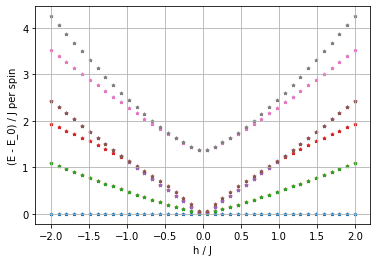

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
print(levels[:, 0])
for level in range(n_low_levels):
    plt.scatter(h_vals, levels[:, level] / N - levels[:, 0] / N, marker='*', s = 10.)
plt.grid(True)
plt.xlabel('h / J')
plt.ylabel('(E - E_0) / J per spin')
plt.show()

As $|h| < J$, the system is in the antiferromagnetic phase, the lowest two states with momenta $k = 0$ and $k = \pi$ are degenerate. At $|h| > J$ the system undergoes phase transition to the paramagnetic phase, where this degeneracy is broken.

The transverse fiend Ising Hamiltonian has many symmetries. Finding the symmetry essentially means finding another basis where the hamiltonian takes the _block-diagonal form_. Among the possible symmetries, there are:

1) Flipping all spins with the operator $\hat{A} = \otimes_i \sigma_i^x$,

2) Total magnetisation conservation with the operator $\hat M = \sum\limits_i \sigma_i^z$ (only at h = 0),

3) Translation symmetry $\hat T: i \to i + 1\,\mbox{mod N}$ with a rather non-local operator form.

If the Hamiltonian has a symmetry $[\hat H, \hat A] = 0$ (block-diagonal form in some basis), $\hat H$ and $\hat A$ can be diagonalized simultaineously. This means that the Hamiltonian does not mix the eigenstates from sectors with different eigenvalues of $\hat A$. This fact allows one to search for $\hat H$ eigenstates in the sectors of $\hat A$ eigenvalues one-by-one, which might significantly reduce the ED-complexity.

As the end of the first excersize, please constuct the operators for the symmetries (1) and (2) and explicitly check that $[\hat H, \hat A] = 0$ for both of them.

We start with the flipping symmetry:

In [16]:
A = np.eye(1)
H = H_j + H_h * np.random.uniform(-2, 2)  # hamiltonian with arbitrary value of field h

# construct the A--operator
for i in range(N):
    A = np.kron(sigma_x, A)
    
assert np.allclose(H.dot(A), A.dot(H))

We proceed with the total magnetisation operator M, which is the symmetry only for $h = 0$:

In [17]:
M = np.zeros((2 ** N, 2 ** N))
H = H_j + H_h * np.random.uniform(-1, 1)  # hamiltonian with arbitrary value of field h

# construct the M--operator
for i in range(N):
    m_local = np.eye(1)
    m_local = fill_identities(m_local, 0, i)
    m_local = np.kron(sigma_z, m_local)
    m_local = fill_identities(m_local, i + 1, N)
    M += m_local
    
assert not np.allclose(H.dot(M), M.dot(H))
assert np.allclose(H_j.dot(M), M.dot(H_j))